## PROJECT EXPLANATION VIDEO LINK :- 

## <span style="color:ORANGE">Customer Churn Prediction</span>

Customer churn is when a customer stops using a company services or any products .In simple words a customer end their relationship with the business.This could happen for many reasons -dissatisfaction,better offer from competetiors ,lack of engagement or any price issues.

Example:-
- A mobile user ,switiching to a different sim or different network
- A subscriber cancelling a netflix or any prime subscription
- A bank customer closing their account

Why's this churn is important?
- In nowdays a customers are valuable ,companies spend a lot of money acquring new customers.
- Losing the customer means lost revenue and additional costs to replacements.So reducing churn is critical to a company's long term success.
- Preicting churn early helps in taking proactive measures like offering discounts,better customer support.


### <span style="color:blue">Main Objective of this Project:-</span>
- The main goal of this project is to design and implement a predctive machine learning model that can classify customers into two categories
   - Churn(yes)-customers who are ready to discontinue the service
   - No Churn -customers who are likely remain with the company
- This classification task is essential in helping companies foresee customer behavior, take preventive measures, and retain their existing customers, which is crucial for business growth.

#### <span style="color:blue"> Business Purpose
1. Predict Customers Likely to Churn
  - What does it mean?
    - We aim to identify patterns in customer behavior by analyzing their:
        - Demographic information (age, gender, senior citizen status)
        - Account history (tenure, payment method, contract type)
        - Service usage (internet, online security, tech support)
        - Billing information (monthly charges, total charges)

  - Using this information, we train a machine learning model to predict whether a customer is likely to leave in the near future.
       - Why is it important?
            - Predicting churn gives the business time to act.
            - Instead of waiting for customers to leave, the company can identify at-risk customers before they churn.
            - The model acts as an early warning system.
2. Use Predictions to Apply Retention Strategies
   - Once high-risk customers are predicted, targeted retention strategies can be launched. This ensures that the company's   efforts    are personalized, cost-effective, and proactive.
   Examples of retention strategies:
     - Offering discounts to customers who are likely to churn.
    - Providing loyalty rewards to long-tenure users.
    - Escalating customer service quality for at-risk individuals.
    - Scheduling follow-up calls from the customer relationship team.
    - Recommending better or more personalized service plans.

3. Improve Business Profitability
4. Boost Customer Satisfaction
   - Early intervention makes customers feel valued.
   - Targeted communication avoids unnecessary upselling or irrelevant campaigns.
   - Personalized offers lead to better experiences, building trust and loyalty.



#### <span style="color:blue">Dataset Description

- **gender** – Gender of the customer  
- **SeniorCitizen** – Whether the customer is a senior citizen (0: No, 1: Yes)  
- **Partner** – Whether the customer has a partner (Yes/No)  
- **Dependents** – Whether the customer has dependents (Yes/No)  
- **tenure** – Number of months the customer has stayed with the company  
- **PhoneService** – Whether the customer has phone service (Yes/No)  
- **MultipleLines** – Whether the customer has multiple lines (Yes/No)  
- **InternetService** – Customer’s internet service provider (DSL, Fiber optic, No)  
- **OnlineSecurity** – Whether the customer has online security add-on (Yes/No)  
- **OnlineBackup** – Whether the customer has online backup add-on (Yes/No)  
- **DeviceProtection** – Whether the customer has device protection add-on (Yes/No)  
- **TechSupport** – Whether the customer has tech support add-on (Yes/No)  
- **StreamingTV** – Whether the customer has streaming TV add-on (Yes/No)  
- **StreamingMovies** – Whether the customer has streaming movies add-on (Yes/No)  
- **Contract** – Type of contract the customer has (Month-to-month, One year, Two year)  
- **PaperlessBilling** – Whether the customer uses paperless billing (Yes/No)  
- **PaymentMethod** – Customer’s payment method (Electronic check, Mailed check, etc.)  
- **MonthlyCharges** – The amount charged to the customer monthly  
- **TotalCharges** – The total amount charged to the customer  
- **Churn** – Whether the customer churned (Yes/No)


In [1]:
#import libraries
import pandas as pd #used for manipulation and analysis 
import numpy as np # numerical operations ,handling arrays and mathematical functions

import matplotlib.pyplot as plt  # Plotting library to create basic graphs like line plots, bar charts, scatter plots.
import seaborn as sns   # It’s useful for advanced visualizations like heatmaps, count plots, box plots.

from sklearn.model_selection import train_test_split,GridSearchCV # Splits your data into training and testing sets, Gridsearchcv used Searches for the best hyperparameters by cross-validating combinations.

from sklearn.preprocessing import LabelEncoder ,StandardScaler # Converts categorical text labels into numeric form
from sklearn.linear_model import LogisticRegression #Classification model used for binary
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
# Ensemble of decision trees – good at handling overfitting and nonlinear data. 
# GradientBoostingClassifier:
# Boosting model that builds trees sequentially to reduce errors from previous ones. Generally more accurate but slower than Random Forest.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report  # Used to evaluate the performance of classification models.

from sklearn.impute import SimpleImputer # Automatically fills missing values (like replacing NaNs with mean, median, etc.)
from imblearn.over_sampling import SMOTE  # Used for handling imbalanced datasets by synthetically generating new examples of the minority class.

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Customer_data - customer_data.csv') #Load the data set 

In [3]:
df.head() # This function will show the top 5 rows in the data frame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail() #Tail function shows the last 5 rows in the data frame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [5]:
df.info() # This info function will shows the information related to the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe() # This will shws all the stastical information 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.shape # This function shows the how many rows as well as columns would be present in the dataset

(7043, 21)

In [8]:
df.columns #This shows the all the columns are present in the data frame

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.isnull().sum() #This function will show the is there any null values present in the column

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #: Converts the TotalCharges column to a numeric (float) data type.
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True) #Replaces any NaN values in the TotalCharges column with the corresponding value from the MonthlyCharges column (row by row).

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.duplicated().sum() # This function shows the is there any duplicated values are present or not 

0

## Exploratory Data Analysis (EDA)

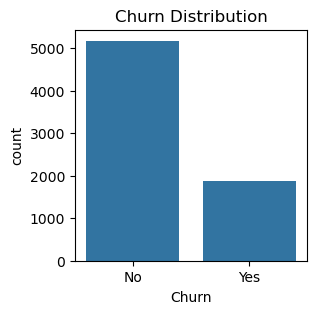


Churn distribution:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [13]:
# Explore target variable distribution
plt.figure(figsize=(3,3))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()
print("\nChurn distribution:\n", df['Churn'].value_counts(normalize=True))

#### <span style="color:blue"> Analyzing above chart 
The bar chart titled "Churn Distribution" visually represents the number of customers for each 'Churn' category:
- 'No' (Churn): The left bar, significantly taller, indicates that a large majority of customers did not churn. The count appears to be slightly over 5000.
- 'Yes' (Churn): The right bar, much shorter, indicates that a smaller number of customers did churn. The count appears to be less than 2000, probably around 1900-ish.
- This plot clearly shows an imbalanced dataset, where the 'No' class (non-churn) is much more prevalent than the 'Yes' class (churn).

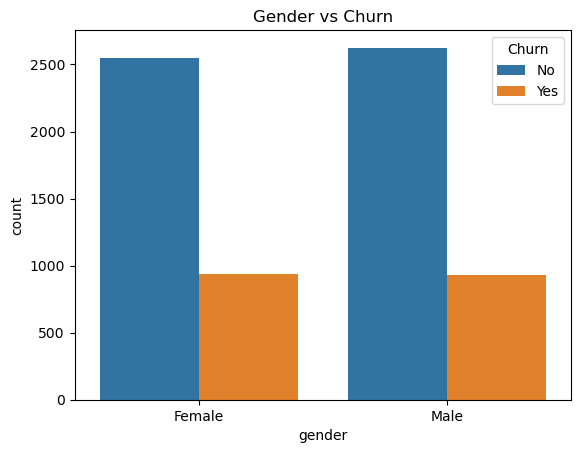

In [14]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.show()

#### <span style="color:blue">Visual Analysis (the Bar Chart with Hues):
- X-axis: Labeled "gender", showing categories "Female" and "Male".
- Y-axis: Labeled "count", indicating the number of customers.
- Legend: Shows that blue bars represent "No" churn, and orange bars represent "Yes" churn.
- Bars for 'Female':
- Blue bar (No Churn): Approximately 2550-2600 female customers did not churn.
- Orange bar (Yes Churn): Approximately 900-950 female customers did churn.
- Bars for 'Male':
    - Blue bar (No Churn): Approximately 2600-2650 male customers did not churn.
     - Orange bar (Yes Churn): Approximately 900-950 male customers did churn.


Interpretation:
- When comparing the "No" churn bars for "Female" and "Male", they are very similar in height. The same is true for the "Yes" churn bars for both genders.
This visual inspection suggests that:
- The total number of male and female customers in the dataset is roughly balanced.
- The proportion of churners within the female group appears to be very similar to the proportion of churners within the male group. In other words, gender does not seem to be a significant factor influencing churn in this dataset. The churn rate for males is roughly the same as for females.

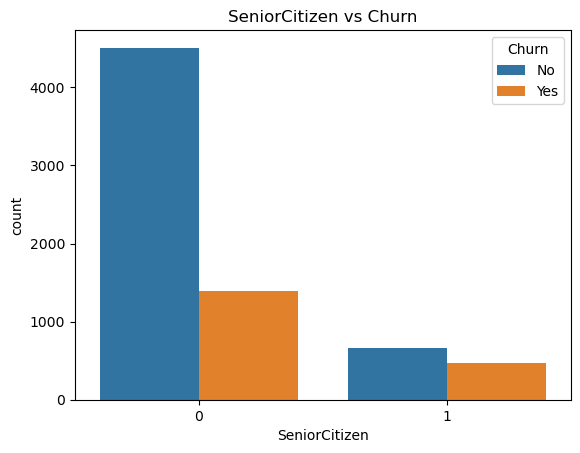

In [15]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('SeniorCitizen vs Churn')
plt.show()


#### Analysis and recommendations
- The graph compares two groups: "SeniorCitizen 0" (meaning not a senior citizen) and "SeniorCitizen 1" (meaning a senior citizen).
- For each of these groups, it shows how many people "Churned" (meaning they left the service, shown in orange as "Yes") versus how many "Did Not Churn" (meaning they stayed, shown in blue as "No
- Recommendationas
     - Investigate Senior Citizen Churn
         - Understand Why: Dig deeper into why senior citizens are churning more. Is it about pricing, technical support, ease of use of the service/product, features, or something else?
        - Feedback: Conduct surveys or interviews with senior citizens who have churned or are at risk of churning.
    - Offers for Senior Citizens:
        - Special Packages
        - Clear Communication:

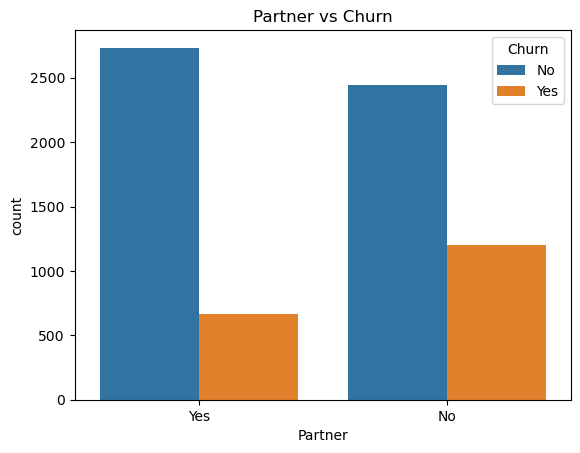

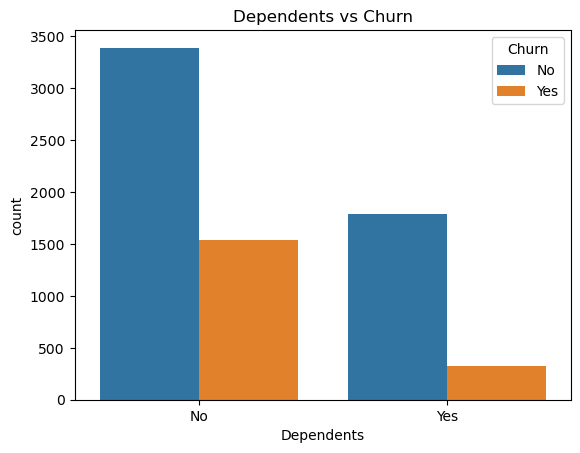

In [16]:
for col in ['Partner', 'Dependents']:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

#### Analysis and Recommendation
CHART 1
- Customers without a partner (Partner = 0): A good number stayed (blue bar), but also a significant number left (orange bar). The proportion of churners here is quite noticeable.
- Customers with a partner (Partner = 1): More of these customers stayed (taller blue bar) compared to those without partners. Crucially, a much smaller proportion of customers with partners churned (shorter orange bar) compared to those without partners.
- Simple Insight: Customers who have a partner are less likely to churn than customers who do not have a partner.
CHART 2
- Customers without dependents (Dependents = 0): A large number stayed, but also a very significant number left. The orange bar is quite tall here.
- Customers with dependents (Dependents = 1): Fewer customers in this group overall. However, a much larger proportion of them stayed (taller blue bar) and a much smaller proportion of them churned (very short orange bar) compared to those without dependents.
- Simple Insight: Customers who have dependents are much less likely to churn than customers who do not have dependents.
#### Recomendation
- Both charts point to a similar theme: customers who are part of a household (having a partner or dependents) are more "sticky" and less likely to leave.
- Customers who live alone or don't have family relying on them are much more likely to leave. You need to pay special attention to these customers to make sure they feel your service is valuable enough for them to stay.

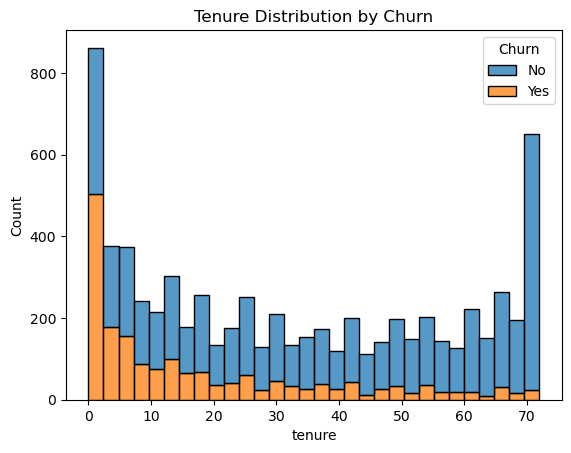

In [17]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Tenure Distribution by Churn")
plt.show()

- High Churn at the Beginning (Tenure 0-10 months):

- The very first bar (tenure 0, meaning very new customers) has a huge orange section. This means a very large number of new customers churn almost immediately.
- Churn remains high, though decreasing, for customers in their first few months (up to about 10-15 months). This is often called "early churn."
Lower Churn in the Middle (Tenure 10-60 months):

- For customers who have been with the service for a moderate period (roughly 10 to 60 months), the orange (churn) part of the bars is much smaller relative to the blue (stayed) part. This indicates that once a customer passes the initial period, they are more likely to stay.
Increased Churn at the End (Tenure 60+ months):

- As customers reach very long tenures (around 60 months and beyond, especially the very last bar at 70+ months), there's a noticeable increase in the orange (churn) section again. While the absolute number of churners might be lower than the new customer churn, the proportion of long-term customers who churn seems to rise. This could be due to contracts ending, feeling taken for granted, or competitors offering better deals.
Simple Interpretation Summary:

- Most customers leave very early.
- Once customers stay past the first few months, they are quite loyal.
- Very long-term customers also start to leave more often.

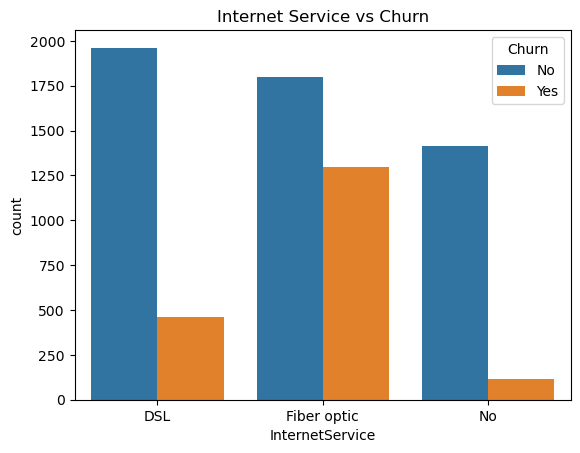

In [18]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Churn")
plt.show()

#### Analysis and Recommendations
- Simple Interpretation Summary:
    - Fiber optic customers are leaving the most.
     - DSL customers are relatively loyal.
     - Customers without internet service are very loyal.
#### Recommendations
fiber optic internet customers are leaving in droves. You absolutely need to figure out why they are unhappy (speed, price, support?) and fix those issues. Your DSL and non-internet customers are much happier, so keep them that way, and be careful if you try to get your DSL customers to switch to fiber until you've solved the fiber churn problem.

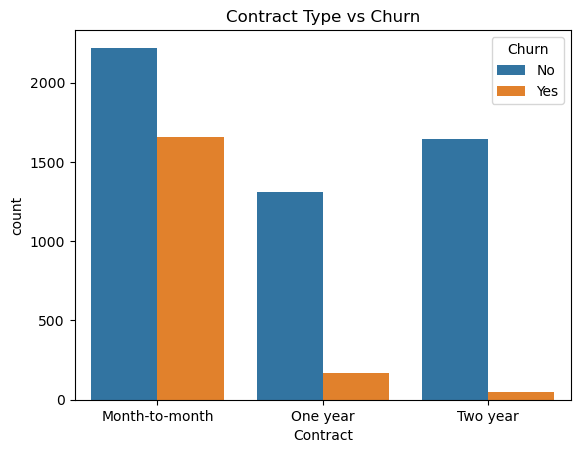

In [19]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()

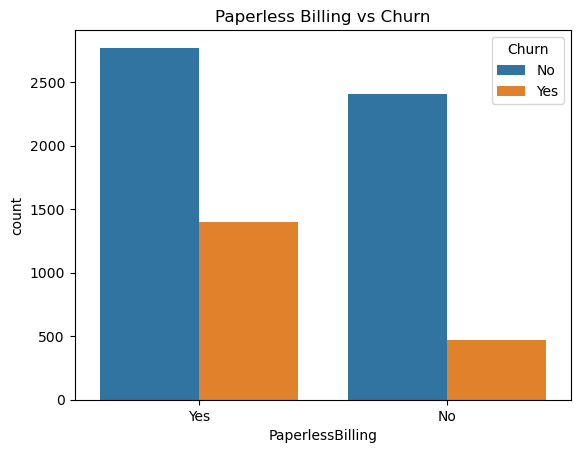

In [20]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Paperless Billing vs Churn')
plt.show()

#### Analysis and Recommendation
- Customers who use paperless billing are more likely to churn.
- Customers who get paper bills are more likely to stay.
- This is a counter-intuitive finding for many companies that push paperless billing for cost savings and environmental reasons.
#### Recommendations
-Investigate Paperless Billing Churn Drivers:
-  Why the churn? Don't just assume paperless billing causes churn directly. It's likely a symptom or correlated with other issues. Customers who opt for paperless billing might be more tech-savvy, younger, or more sensitive to digital experience issues .
-  Optimize the Digital Billing Experience:
      - Improve ease of access: Make sure bills are extremely easy to find, download, and understand in the online portal or app.
- Customers who get digital bills are leaving more often than those who get paper bills. Instead of just pushing paperless, you need to find out why these digital-first customers are unhappy and make sure their online billing experience is smooth, clear, and provides value.

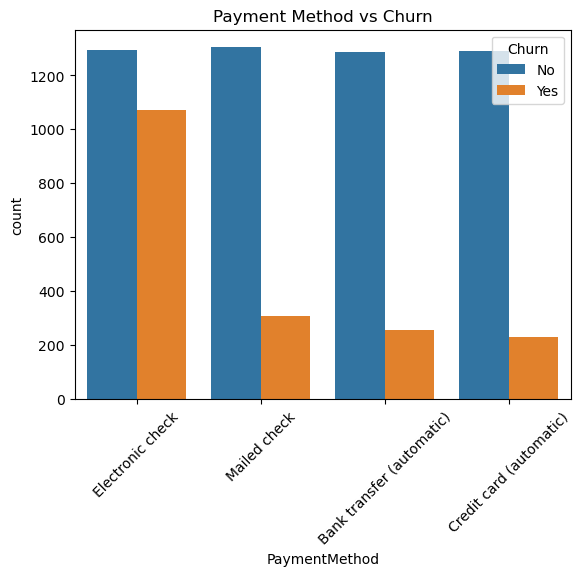

In [21]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Payment Method vs Churn')
plt.show()

#### Analysis and Recommendations
- Electronic Check has a much higher churn rate: For customers using "Electronic check," the orange bar (churn) is very close in height to the blue bar (no churn). This means a very large proportion of customers using electronic checks are leaving. This is the biggest churn problem area by payment method.
- Other methods have lower churn rates: For "Mailed check," "Bank transfer (automatic)," and "Credit card (automatic)," the blue bars (no churn) are significantly taller than the orange bars (churn). This indicates that a much smaller proportion of customers using these methods are leaving.
- The payment method seems to be strongly related to whether a customer churns, with "Electronic check" users being a major concern.
#### Recommendations
- Investigate Electronic Check Payment Issues:
  - Why the churn? Understand why customers using electronic checks are churning so much. Is it about convenience, reliability of payment, security concerns, or a lack of automatic payment options/reminders?
  - User Experience: Are there any common issues or frustrations associated with the electronic check payment process? (e.g., failed payments, complicated steps).
  - Targeted Surveys/Feedback: Gather direct feedback from customers who use or have churned while using electronic checks.
- Encourage Automatic Payment Methods (Bank Transfer & Credit Card)
- Customers paying by "Electronic check" are leaving in large numbers. Try to understand why they're unhappy with that payment method and encourage them to switch to automatic bank transfers or credit card payments, as those customers tend to stay.

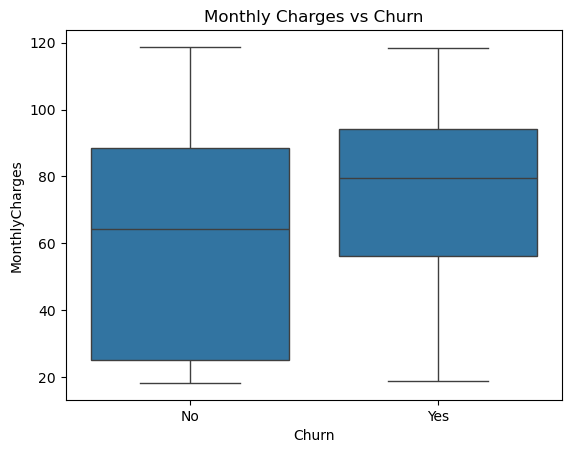

In [22]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

#### Analysis and Recommendation
- Left Box ("No" Churn): This box represents customers who did not churn (they stayed). It shows the distribution of their monthly charges.
    - The middle line is the average (median) monthly charge for customers who stayed.
    - The bottom and top of the box show the range for the middle 50% of these customers.
     - The lines (whiskers) show the broader range of charges.
- Right Box ("Yes" Churn): This box represents customers who did churn (they left). It shows the distribution of their monthly charges.
     - Similarly, the middle line is the average (median) monthly charge for customers who left.
     - The box and whiskers show the distribution of charges for this group.
#### Recommendations
- Enhance Value Proposition for High-Paying Customers:
    - Premium Support: Offer exclusive or enhanced customer support for customers on higher-paying plans.
    - Loyalty Programs/Perks: Reward high-paying customers with exclusive benefits, early access to new features, or personalized offers to make them feel valued
- Customer Communication & Transparency:
    - Clarity on Benefits: Ensure that customers on higher-cost plans clearly understand all the benefits they are receiving. Sometimes, customers might be paying more but not fully utilizing or even being aware of all the features.

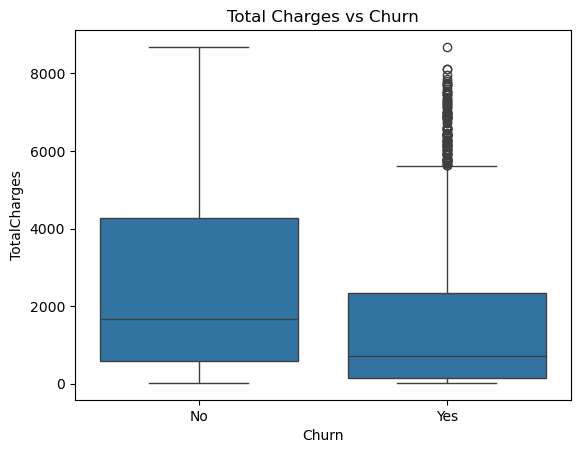

In [23]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()

### Analysis and recommendation
- Customers who stayed ("No" churn) generally have much higher Total Charges. The "No" box is significantly taller and positioned higher on the y-axis (TotalCharges) than the "Yes" box. Their median (middle line) is also much higher.
- Customers who left ("Yes" churn) generally have lower Total Charges. The "Yes" box is shorter and positioned much lower on the y-axis. Their median is also much lower.
- This suggests that customers with lower overall spending are more likely to churn.
#### Recommendations
- Focus on Lower-Spending Customers:
    - Identify at-risk low spenders: Find customers who have low total charges and try to identify other risk factors for churn (e.g., short tenure, specific service types).
    - Understand their needs: Why are their total charges low? Are they not using enough services, finding prices too high for their usage, or simply not engaging much?
- Improve Initial Experience:
    - Many customers churning with low total charges might be newer customers who haven't built up high charges yet.

In [24]:
df.groupby('Churn').mean(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2549.999497
Yes,0.254682,17.979133,74.441332,1531.796094


In [25]:
df.groupby('Churn').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


## Data Preprocessing and Feature Engineering

In [26]:
# Create tenure groups
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], 
                          labels=['0-1 Year', '1-2 Years', '2-4 Years', '4+ Years'])
# Create spending category
df['SpendingCategory'] = pd.cut(df['MonthlyCharges'], bins=[0, 40, 80, 120],
                               labels=['Low', 'Medium', 'High'])
# Drop unnecessary columns
df.drop(['customerID'], axis=1, inplace=True)

In [27]:
# Handle categorical variables
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod', 'TenureGroup', 'SpendingCategory']
# Label encoding for binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})
# One-hot encoding for multi-category columns
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col not in binary_cols], drop_first=True)
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [28]:
X = df.drop('Churn', axis=1) #Independent variable
y = df['Churn'] # dependent variable
smote = SMOTE(random_state=42)  # This smote function will balance the classes
X_res, y_res = smote.fit_resample(X, y)

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# model development and evaluation of model performance 

In [30]:
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Predict on test data
rf_pred = rf_model.predict(X_test)

In [31]:
# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

Random Forest Performance:
Accuracy: 0.8502
Precision: 0.8536
Recall: 0.8503
F1 Score: 0.8520


In [32]:
# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
# Train the model
gb_model.fit(X_train, y_train)
# Predict on test data
gb_pred = gb_model.predict(X_test)

In [33]:
# Calculate metrics
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
print("\nGradient Boosting Performance:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1 Score: {gb_f1:.4f}")


Gradient Boosting Performance:
Accuracy: 0.8386
Precision: 0.8277
Recall: 0.8608
F1 Score: 0.8439


In [34]:
# Initialize Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
# Train the model
lr_model.fit(X_train, y_train)
# Predict on test data
lr_pred = lr_model.predict(X_test)

In [35]:
# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print("\nLogistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")


Logistic Regression Performance:
Accuracy: 0.8309
Precision: 0.8307
Recall: 0.8370
F1 Score: 0.8338


In [36]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)   
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)
# Hyperparameter tuning for best model (Gradient Boosting)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Get best model
best_model = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.850242   0.853589  0.850334  0.851958
Gradient Boosting    0.838647   0.827681  0.860820  0.843925
Logistic Regression  0.830918   0.830653  0.836988  0.833808

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Evaluate best model
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:


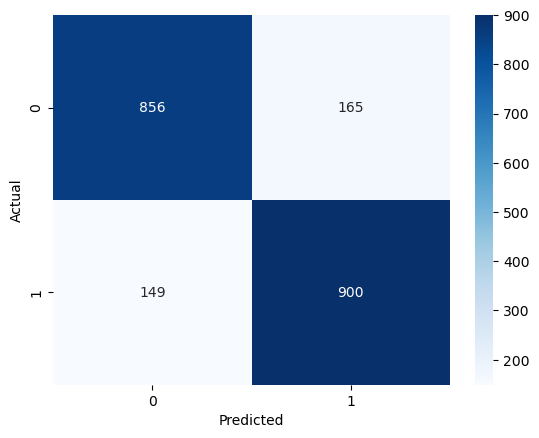

In [39]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

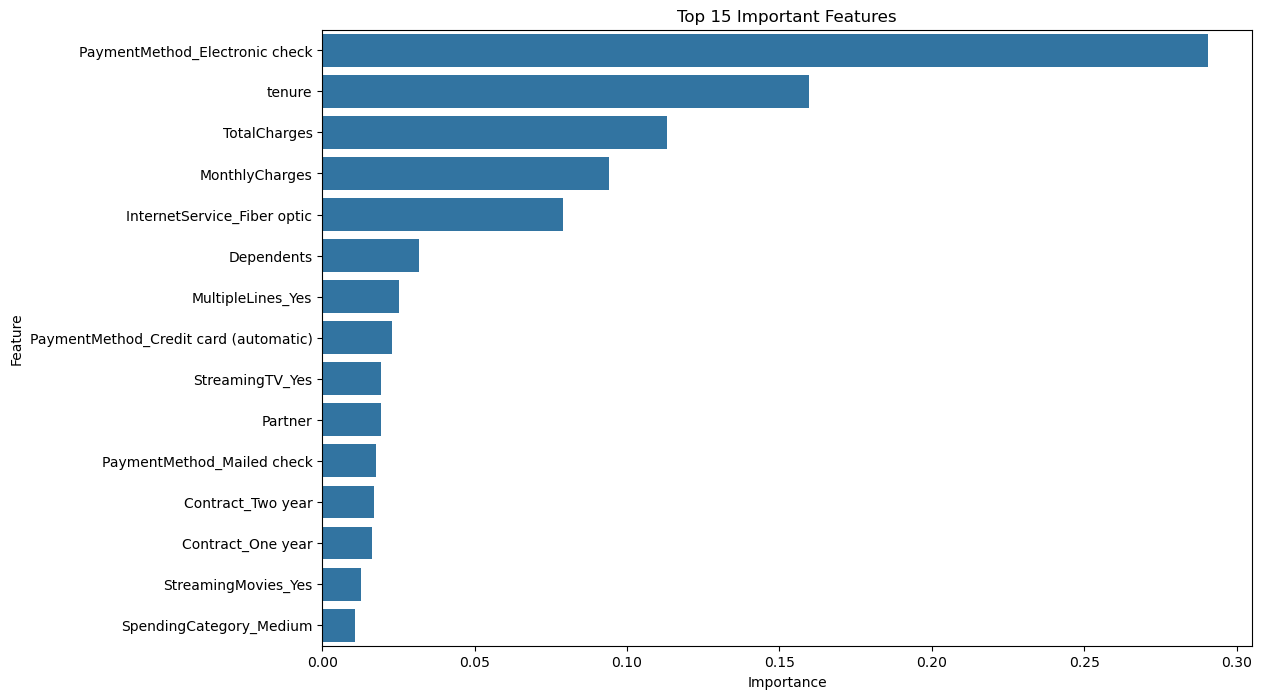

In [43]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features')
plt.show()

In [45]:
# Load and preprocess data
df = pd.read_csv('Customer_data - customer_data.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)
# Encode target variable
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
# Select features and target
features = ['tenure', 'MonthlyCharges', 'Contract', 'InternetService', 
            'OnlineSecurity', 'TechSupport', 'PaymentMethod']
X = df[features]
y = df['Churn']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X[['tenure', 'MonthlyCharges']])

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Prediction function
def predict_churn():
    """
    Takes customer information as input and predicts churn probability
    """
    print("Please provide the following customer information:\n")
    
    inputs = {
        'tenure': int(input("Tenure (months with company): ")),
        'MonthlyCharges': float(input("Monthly Charges ($): ")),
        'Contract': input("Contract Type (Month-to-month, One year, Two year): "),
        'InternetService': input("Internet Service (DSL, Fiber optic, No): "),
        'OnlineSecurity': input("Online Security (Yes, No, No internet service): "),
        'TechSupport': input("Tech Support (Yes, No, No internet service): "),
        'PaymentMethod': input("Payment Method (Electronic check, Mailed check, Bank transfer, Credit card): ")
    }
    
    # Create input DataFrame
    input_df = pd.DataFrame([inputs])
    
    # One-hot encode categorical features
    input_encoded = pd.get_dummies(input_df)
    
    # Ensure all columns in training data are present
    for col in X.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    
    # Scale numerical features
    input_encoded[['tenure', 'MonthlyCharges']] = scaler.transform(
        input_encoded[['tenure', 'MonthlyCharges']]
    )
    
    # Reorder columns to match training data
    input_encoded = input_encoded[X.columns]
    
    # Make prediction
    prediction = model.predict(input_encoded)
    probability = model.predict_proba(input_encoded)[0][1]
    # Return result
    result = "Churn" if prediction[0] == 1 else "No Churn"
    return f"\nPrediction: {result} | Probability: {probability:.2%}"

# Example usage
print(predict_churn())

Please provide the following customer information:



Tenure (months with company):  2
Monthly Charges ($):  53.85
Contract Type (Month-to-month, One year, Two year):  Month-to-month
Internet Service (DSL, Fiber optic, No):  DSL
Online Security (Yes, No, No internet service):  Yes
Tech Support (Yes, No, No internet service):  No
Payment Method (Electronic check, Mailed check, Bank transfer, Credit card):  Mailed check



Prediction: Churn | Probability: 87.00%
